# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [1]:
# import libraries here
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [2]:
# YOUR CODE HERE
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [4]:
# YOUR CODE HERE
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


Hay 3 columnas City, State y Temperature, los cuales son string, string y float respectivamente.

#### Selecciona las filas en las que el estado es New York

In [5]:
# YOUR CODE HERE
new_york_data = temp[temp['State'] == 'New York']
new_york_data

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [6]:
# YOUR CODE HERE
mean_ny_temp = temp['Temperature'].mean()
print('The mean of the temperature in NY is:', mean_ny_temp)

The mean of the temperature in NY is: 15.15873015873016


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [7]:
# your answer here
temp_above_15 = temp[temp['Temperature'] > 15]
temp_above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [8]:
# YOUR CODE HERE
temp_above_15 = temp[temp['Temperature'] > 15]
cities_temp_above_15 = temp_above_15[['City']]
cities_temp_above_15

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [9]:
# YOUR CODE HERE
condition = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)
cities = temp[condition][['City']]
cities

,City
0,NYC
3,Hartford


In [10]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [11]:
# YOUR CODE HERE
mean_temp = temp.groupby('State')['Temperature'].mean()
std_temp = temp.groupby('State')['Temperature'].std()
temp_stats = pd.concat([mean_temp, std_temp], axis=1)
temp_stats.columns = ['Mean_Temperature', 'Std_Temperature']
temp_stats

,Mean_Temperature,Std_Temperature
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [12]:
# YOUR CODE HERE
employee = pd.read_csv('employee.csv')

#### Explore los tipos de datos del marco de datos >> Employee <<. Comenta tus resultados

In [13]:
# YOUR CODE HERE
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


>> Tenemos 7 columnas: Name, Department, Education, Gender, Title, Years y Salary. Las cinco primeras columnas son de tipo <string> y las dos últimas columnas son de tipo <Int>. No hay nulos en el dataframe.

#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

array([[<Axes: title={'center': 'Years'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

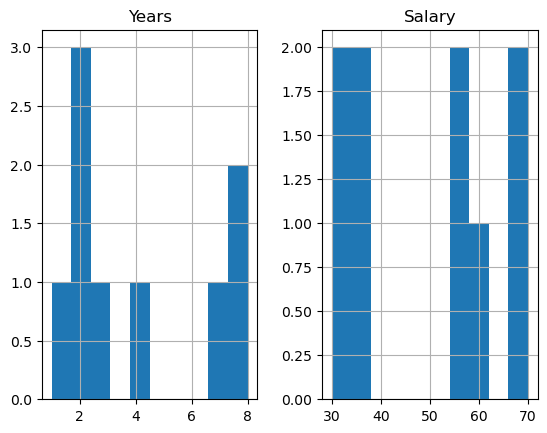

In [14]:
# your answer here
employee.hist()

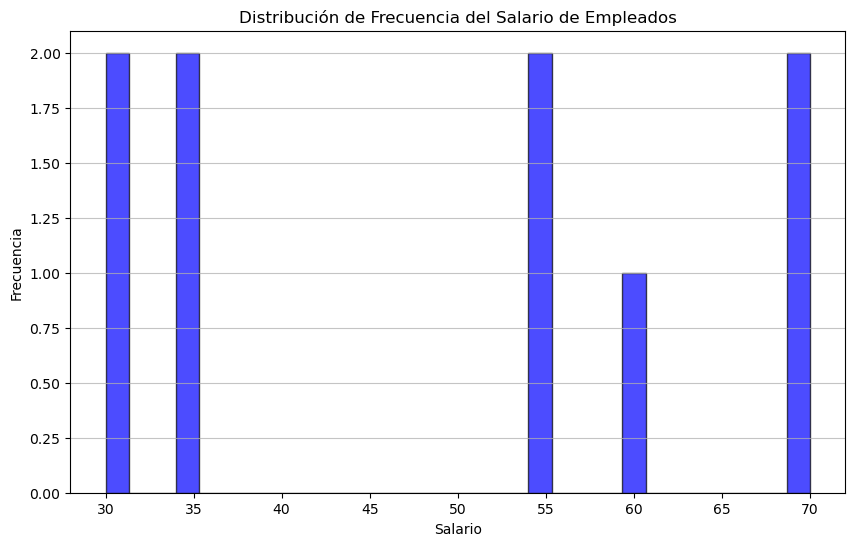

In [15]:
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.hist(employee['Salary'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencia del Salario de Empleados')
plt.grid(axis='y', alpha=0.75)
plt.show()

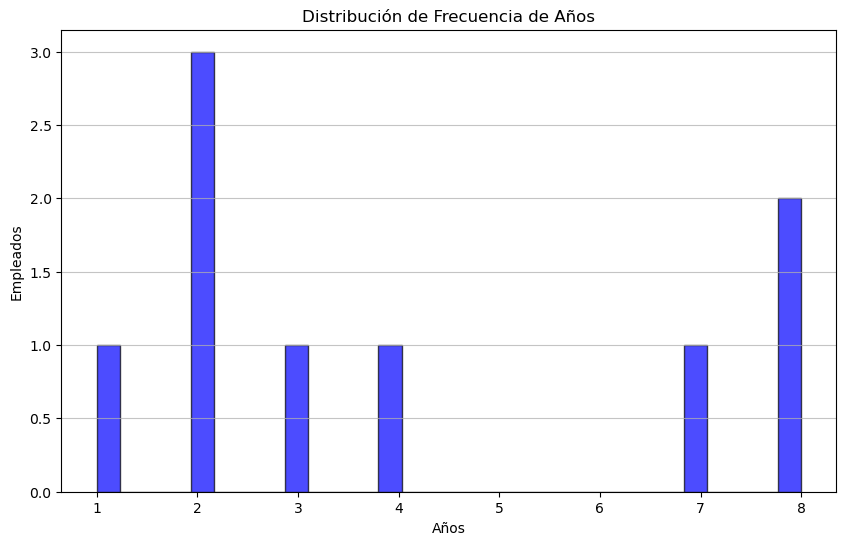

In [16]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.hist(employee['Years'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Años')
plt.ylabel('Empleados')
plt.title('Distribución de Frecuencia de Años')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [17]:
# YOUR CODE HERE
mean_salary = employee ['Salary'].mean()
print("El salario medio de la empresa es:", mean_salary)

El salario medio de la empresa es: 48.888888888888886


#### ¿Cuál es el salario más alto?

In [18]:
# YOUR CODE HERE
max_salary = employee ['Salary'].max()
print("El salario más alto de la empresa es:", max_salary)

El salario más alto de la empresa es: 70


#### ¿Cuál es el salario más bajo?

In [19]:
# YOUR CODE HERE
min_salary = employee['Salary'].min()
print("El salario más bajo de la empresa es:", min_salary)

El salario más bajo de la empresa es: 30


#### ¿Quiénes son los empleados con el salario más bajo?

In [20]:
# YOUR CODE HERE
lowest_salary = employee['Salary'].min()
employees_with_lowest_salary = employee[employee['Salary'] == lowest_salary]
employees_with_lowest_salary

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [21]:
# YOUR CODE HERE
empleado_david = employee[employee['Name'] == 'David']
empleado_david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [22]:
# YOUR CODE HERE
salario_david = employee.loc[employee['Name'] == 'David','Salary']
print("El sueldo de David es:", salario_david.values[0])

El sueldo de David es: 30


#### Printea todas las líneas en las que el cargo es asociado

In [23]:
# YOUR CODE HERE
associate_employees = employee[employee['Title'].str.contains('associate')]
associate_employees

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [24]:
# YOUR CODE HERE
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [25]:
# YOUR CODE HERE
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [26]:
# YOUR CODE HERE
associates_above_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
print(associates_above_55)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [27]:
# YOUR CODE HERE
mean_salary_by_years = employee.groupby('Years')['Salary'].mean().reset_index()
mean_salary_by_years.columns = ['Years', 'Mean Salary']
mean_salary_by_years

,Years,Mean Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


#### ¿Cuál es el salario medio por título?

In [28]:
# YOUR CODE HERE
mean_salary_by_years = employee.groupby('Title')['Salary'].mean().reset_index()
mean_salary_by_years.columns = ['Title', 'Mean Salary']
mean_salary_by_years

,Title,Mean Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

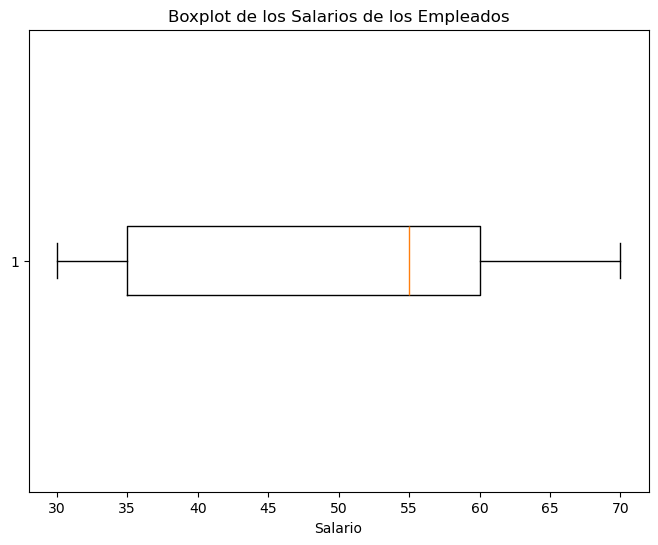

In [54]:
# YOUR CODE HERE
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.boxplot(employee['Salary'], vert=False)
plt.xlabel('Salario')
plt.title('Boxplot de los Salarios de los Empleados')
plt.show()

In [55]:
# print first quartile here
q1 = employee['Salary'].quantile(0.25)
q1

35.0

In [56]:
# print third quartile here
q3 = employee['Salary'].quantile(0.75)
q3

60.0

#### ¿Es diferente el salario medio por género?

In [57]:
# your answer here
mean_salary_by_gender = employee.groupby('Gender')['Salary'].mean()
print("Salario medio por genero:")
mean_salary_by_gender

Salario medio por genero:


Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [58]:
# your answer here
grouped = employee.groupby('Department')
min_years = grouped['Years'].min()
mean_years = grouped['Years'].mean()
max_years = grouped['Years'].max()
min_salary = grouped['Salary'].min()
mean_salary = grouped['Salary'].mean()
max_salary = grouped['Salary'].max()
summary_stats = pd.DataFrame({
    'Min_Years': min_years,
    'Mean_Years': mean_years,
    'Max_Years': max_years,
    'Min_Salary': min_salary,
    'Mean_Salary': mean_salary,
    'Max_Salary': max_salary
})
summary_stats

,Min_Years,Mean_Years,Max_Years,Min_Salary,Mean_Salary,Max_Salary
Department,,,,,,
HR,2,4.666667,8,30,45.00,70
IT,1,4.500000,8,30,48.75,70
Sales,2,2.500000,3,55,55.00,55


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [34]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [59]:
# your answer here
pedidos = pd.read_csv('orders.csv')

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [60]:
# your answer here
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [61]:
# your answer here
pedidos

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### ¿Cuál es el precio medio de compra?

In [65]:
# your answer here
mean_amount_spent = pedidos['amount_spent'].mean()
print("El precio medio de compra es:",mean_amount_spent)

El precio medio de compra es: 22.394748504739596


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [66]:
# your answer here
min_price = pedidos['amount_spent'].min()
print("Precio más bajo de compra:",min_price)

Precio más bajo de compra: 0.0


In [67]:
# your answer here
max_price = pedidos['amount_spent'].max()
print("Precio más alto de compra:",max_price)

Precio más alto de compra: 168469.6


#### Seleccione todos los clientes que tenemos en España

In [68]:
# your answer here
clientes_españa = pedidos[pedidos['Country'] == 'Spain']
clientes_españa

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [69]:
# your answer here
numero_clientes_españa = clientes_españa['CustomerID'].value_counts().count()
print("Número de clientes en España:",numero_clientes_españa)

Número de clientes en España: 30


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [70]:
# your answer here
total_articulos_por_cliente = pedidos.groupby('CustomerID')['Quantity'].sum()
clientes_mas_50_articulos = total_articulos_por_cliente[total_articulos_por_cliente > 50]
clientes_mas_50_articulos_df = pedidos[pedidos['CustomerID'].isin(clientes_mas_50_articulos.index)]
clientes_mas_50_articulos_df

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [72]:
# your answer here. Pedidos con mas de 50 articulos comprados
clientes_mas_50_articulos = pedidos[pedidos['Quantity'] > 50]
clientes_mas_50_articulos

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Selecciona pedidos de España superiores a 50 artículos

In [73]:
# your answer here
pedidos_espana_mas_50_articulos = pedidos[(pedidos['Country'] == 'Spain') & (pedidos['Quantity'] > 50)]
pedidos_espana_mas_50_articulos

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Seleccionar todos los pedidos gratuitos

In [74]:
# your answer here
pedidos_gratuitos = pedidos[pedidos['UnitPrice'] == 0]
pedidos_gratuitos

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [75]:
# your answer here
pedidos_lunch_bag = pedidos[pedidos['Description'].str.contains('lunch bag', case=False, na=False)]
pedidos_lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [76]:
# your answer here
pedidos_2011_lunch_bag = pedidos[(pedidos['year'] == 2011) & (pedidos['Description'].str.contains('lunch bag', case=False, na=False))]
pedidos_2011_lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

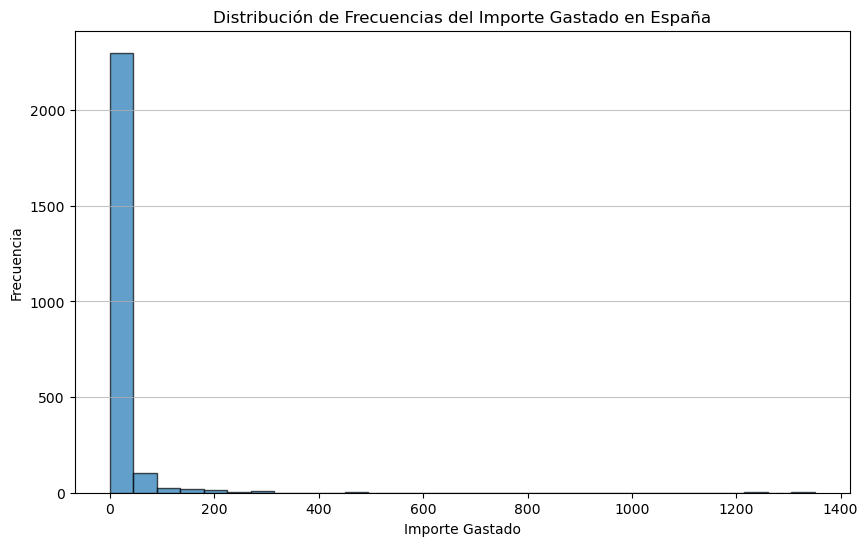

In [77]:
# your answer here
pedidos_espana = pedidos[pedidos['Country'] == 'Spain']
plt.figure(figsize=(10, 6))
plt.hist(pedidos_espana['amount_spent'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de Frecuencias del Importe Gastado en España')
plt.xlabel('Importe Gastado')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [78]:
# your answer here
pedidos_agosto = pedidos[pedidos['month'] == 8]
pedidos_agosto

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [79]:
# your answer here
pedidos_agosto = pedidos[pedidos['month'] == 8]
pedidos_por_pais_agosto = pedidos_agosto['Country'].value_counts()
pedidos_por_pais_agosto

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### ¿Cuál es el gasto medio por país?

In [80]:
# your answer here
gasto_medio_por_pais = pedidos.groupby('Country')['amount_spent'].mean()
print("El gasto medio por país es:",
gasto_medio_por_pais)

El gasto medio por país es: Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                

#### ¿Cuál es el artículo más caro?

In [83]:
# your answer here
articulo_mas_caro = pedidos.loc[pedidos['UnitPrice'].idxmax()]
print(articulo_mas_caro[['Description', 'UnitPrice']])

Description    postage
UnitPrice      8142.75
Name: 118352, dtype: object


#### ¿Cuál fue la cantidad media gastada al año?

In [85]:
# your answer here
cantidad_media_gastada_por_año = pedidos.groupby('year')['amount_spent'].mean()

cantidad_media_gastada_por_año
print("Cantidad media gasta al año:",cantidad_media_gastada_por_año)

Cantidad media gasta al año: year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64
